In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.arrays import numeric

# from google.colab import drive
# drive.mount("/content/drive")

Removed 40 rows with missing data.


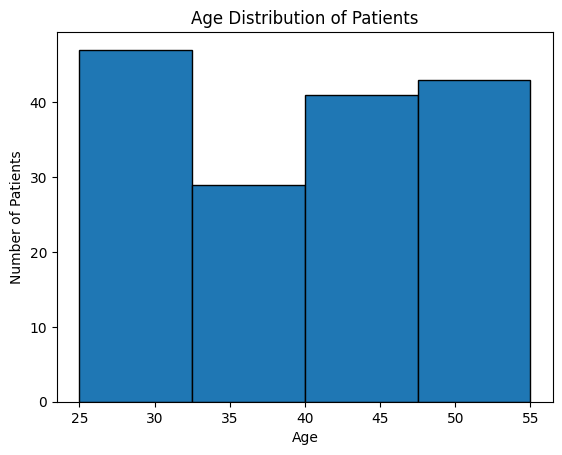

In [10]:
# ---
# Group No. 6
# 1. พิมมาดา แก้วรอด 6410450541
# 2. อภิชญา สุธีระกุล 6410450630
# 3.  ภาณุพันธ์ สุวรรณชาติ 6410451806
# 4. ศุภสุตา คะเช็นแก้ว 6410451873
# ---

group = 6 #
problem = 2 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
df = pd.read_csv(data_path, delimiter='\s+')

# Check for missing data
missing_data = df.isnull().sum()

# Remove rows with missing data
df_cleaned = df.dropna()

# Check if any rows were removed
if len(df_cleaned) < len(df):
    print(f'Removed {len(df) - len(df_cleaned)} rows with missing data.')
else:
    print('No rows with missing data were removed.')

# You can now work with the 'df_cleaned' DataFrame, which contains the data without missing values.
# Define the age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#Creat a new DataFrame
df_out = pd.DataFrame()
# Categorize the age data into bins
df_out['AgeBins'] = pd.cut(df_cleaned['Age'], bins, right=False)

# Calculate the distribution of each age bin
age_distribution = df_out['AgeBins'].value_counts().sort_index()

#Reset index to seperate into 2 columns
df_distribution = age_distribution.reset_index()
#Set columns name
df_distribution.columns = ['Age Group', 'Number of Patients']
#Sort Value
df_distribution = df_distribution.sort_values(by='Number of Patients', ascending=False)
#Select only none zero row
df_distribution = df_distribution[df_distribution['Number of Patients'] > 0]
# Plotting Distribution
df_cleaned['Age'].hist(bins=4, edgecolor='black', grid=False)

# Adding title and labels
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# เซฟผลลัพธ์
df.to_csv(result_path, index=False)

# แสดงผลลัพธ์
df.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()